<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/Homework_3_Poisson_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

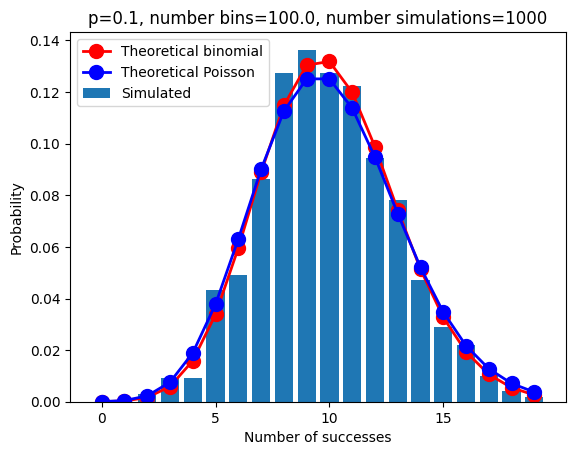

In [2]:
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
# Make an animation comparing binomial and Poisson distributions

# The Poisson process is defined by a rate, lambda, of events/sec
#   (call it plambda to avoid Python lambda)
plambda = 1

# We will consider events generated in a given fixed interval, in seconds.
delta_t = 10

# Define an axis for computing and plotting a histogram of counts
max_successes = 20
bins = np.arange(-0.5, max_successes+0.5, 1)
xaxis = (bins[1:] + bins[:-1])/2

# Number of simulations
num_simulations = 1000

# Loop through different numbers of time bins used to divide up the given
#   interval. Remember this is how we will show the transition from a binomial
#   to a Poisson pdf describing the number of events in the interval: as the
#   number of bins gets larger, the simulation gets closer to considering
#   events occurring at any time and thus the distribution gets closer to Poisson
f = plt.figure()
for n in np.round(np.linspace(1, 100, max_successes)):

   # Check for events in each bin
   #    Scale p so that it is probability of events/bin, not events/sec --
   #    which can be at most =1.
   p = np.minimum(plambda * delta_t/n, 1)

   # Simulate outcomes as the number of events that occurred in the n bins
   #    ("tries"), given p and done N times.
   outcomes = binom.rvs(int(n), p, size=num_simulations)

   # Make a histogram of the outcomes, using the array of counts ("xaxis")
   #    we defined above.
   counts, edges = np.histogram(outcomes, bins)

   # Show a normalized version that is a pdf. Here counts (the x-axis of the
   #    histogram) is a DISCRETE variable, so we just have to add up the values
   plt.bar(xaxis, counts/counts.sum())

   # Plot the theoretical binomial pdf, for the values in xaxis and given n and p.
   binoY = binom.pmf(xaxis, n, p)

   # Show in RED
   plt.plot(xaxis, binoY, 'ro-', linewidth=2, markersize=10)

   # Get the equivalent Poisson pdf using the rate computed for the full
   #    interval: lambda * deltaT
   poissY = poisson.pmf(xaxis, plambda*delta_t)

   # Show in BLUE
   plt.plot(xaxis, poissY, 'bo-', linewidth=2, markersize=10)

   # Labels, etc
   # plt.axis([xaxis([0]), xaxis([-1]), 0, np.maximum(poissY)+0.1])
   plt.title(f'p={p:.1f}, number bins={n}, number simulations={num_simulations}')
   plt.xlabel('Number of successes')
   plt.xticks(np.arange(0, max_successes, 5))
   plt.ylabel('Probability')
   plt.legend(['Theoretical binomial', 'Theoretical Poisson', 'Simulated'], loc='upper left')
   plt.show()

   # Wait
   time.sleep(0.5)

   # Clear for next plot
   clear_output(wait=True)

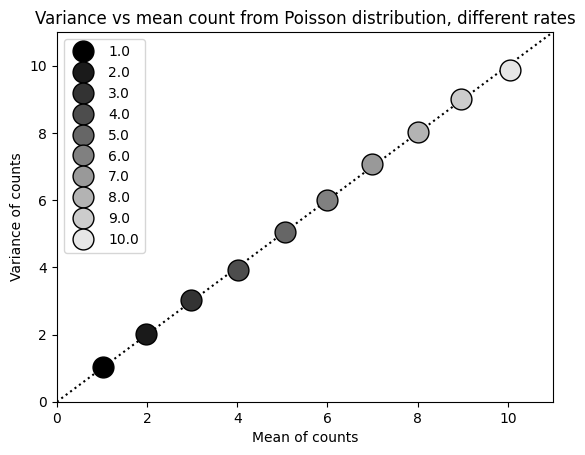

In [3]:
# An interesting property of a Poisson distributon is that var = mean.
#   Let's try it using simulations!

# Set up simulations using various values of lambda
num_lambdas = 10
lambdas = np.linspace(1,10,num_lambdas)
N = 10000 # number of simulations per condition

# Set up plot
f = plt.figure()
plt.axis([0, np.amax(lambdas)+1, 0, np.amax(lambdas)+1])
plt.plot([0, np.amax(lambdas)+1], [0, np.amax(lambdas)+1], 'k:')

# Show labels
plt.xlabel('Mean of counts')
plt.ylabel('Variance of counts')
plt.title('Variance vs mean count from Poisson distribution, different rates')

# Save plot objects to make legend

# cycle through different values of lambda
for idx, val in enumerate(lambdas):

   # Get the counts
   counts = poisson.rvs(val, size=N)

   # Plot var vs mean, with grayscale to indicate lambda
   plt.plot(np.mean(counts), np.var(counts), 'ko', markersize=15, \
            markerfacecolor=str(idx/num_lambdas), label=str(val))

# Show legend for grayscale values = different rates (lambdas)
# strs = cellstr(num2str(lambdas'));
plt.legend()

number of events expected=1000, actual=985


/tmp/ipython-input-4127365044.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')


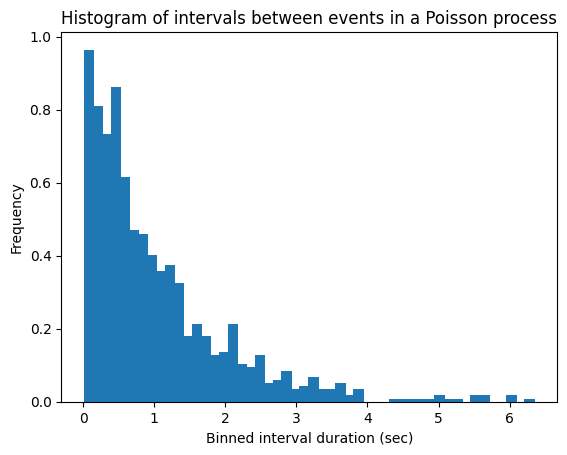

In [6]:
# Let's go back to simulating a Poisson process as the limit of a sequence of Bernoulli trials as the interval size->0.
delta_t = 1000          # Assume the whole process takes this long
plambda = 1             # Rate (events per sec)
num_bins_per_second = 100    # Number of bins in which to check for events
total_bins = round(num_bins_per_second*delta_t)

# First convert lambda (overall rate) to probability/bin, using deltaT events/time divided by bins/time = events/bin
p = plambda * delta_t / total_bins

# Now simulate checking one "outcome" per bin, using the given probability/bin
outcomes = binom.rvs(1, p, size=total_bins)

# Check that the nubmer of events is what we expect
print(f'number of events expected={plambda*delta_t}, actual={np.sum(outcomes==1)}')

# Now for the next part -- instead of looking at the counts per interval, which is what the Poisson distribution described, we are now going to look at the same data but are considering the intervals between events. As you will see below, these intervals are distributed as an exponential.
# First look at the histogram of intervals between events
# Get intervals
intervals_between_events = np.diff(np.where(outcomes==1))

# Convert to seconds
intervals_between_events_sec = intervals_between_events/num_bins_per_second

# Make and show the normalized histogram. Here the interval is a continuous variable (the x-axis is binned in the histogram to visualize it, but the actual values can take on any continuous value because they represent the amount of time since the previous event), so to normalize the histogram to make a pdf we can't just sum the values -- we have to sum the values multiplied by the bin width (i.e., take the integral). We use numpy's "trapz" which treats each bin as a trapezoid (because the heights before and after can be slightly different) to compute the integral:
counts, edges = np.histogram(intervals_between_events_sec, bins=50)
plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')
plt.title('Histogram of intervals between events in a Poisson process')
plt.xlabel('Binned interval duration (sec)')
plt.ylabel('Frequency')

# Compare to an exponential distribution (see below), in red, with the rate parameter lambda equal to 1/lambda
# plt.plot(edges[:-1], expon.pdf(edges[:-1], scale=1/plambda), 'r-', linewidth=2)
plt.show()
